In [160]:
#Recuerda cargar el archivo predictPy en notebook
import warnings
import pandas as pd
import numpy  as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from predictPy import Analisis_Predictivo
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

In [161]:
class MetricsCalculator:
    def __init__(self, confusion_matrix):
        self.confusion_matrix = confusion_matrix

    def calculate_metrics(self):
        tn, fp, fn, tp = self.confusion_matrix

        precision_global = (tp + tn) / sum(self.confusion_matrix)
        error_global = 1 - precision_global

        precision_positiva = tp / (fn + tp)
        precision_negativa = tn / (tn + fp)

        metrics_dict = {
            "Precisión Global": precision_global,
            "Error Global": error_global,
            "Precisión Positiva": precision_positiva,
            "Precisión Negativa": precision_negativa
        }

        return metrics_dict

En este ejercicio vamos a trabajar con los datos del archivo 'hotel_bookings_completos.csv'. El conjunto de datos consta de 20,379 filas y 19 columnas

In [136]:
#lectura de datos
datos = pd.read_csv('C:/Users/uriar/OneDrive/Fátima Uriarte/Fati Files/PROMIDAD Generacion ETA/Python/3. Metodos Supervisados Python/Clase 4/Tarea4/hotel_bookings_completo.csv',delimiter = ',',decimal = ".")
print("Hotel bookings completo: ", datos.shape, "\n")

Hotel bookings completo:  (20379, 19) 



In [137]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20379 non-null  object 
 1   is_canceled                     20379 non-null  object 
 2   lead_time                       20379 non-null  int64  
 3   arrival_date_month              20379 non-null  object 
 4   stays_in_weekend_nights         20379 non-null  int64  
 5   stays_in_week_nights            20379 non-null  int64  
 6   adults                          20379 non-null  int64  
 7   children                        20379 non-null  int64  
 8   babies                          20379 non-null  int64  
 9   previous_cancellations          20379 non-null  int64  
 10  previous_bookings_not_canceled  20379 non-null  int64  
 11  assigned_room_type              20379 non-null  object 
 12  booking_changes                 

In [138]:
# Convierte las variables a categórica
for col in ['hotel', 'arrival_date_month', 'assigned_room_type', 'deposit_type', 'customer_type']:
    datos[col] = datos[col].astype('category')
    datos[col] = datos[col].cat.codes
    datos[col] = datos[col].astype('category')
datos.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,Yes,74,3,1,0,2,0,0,0,0,0,0,0,0,2,57.60,0,0
1,1,Yes,62,3,2,2,2,0,0,0,0,0,0,0,0,2,51.50,0,1
2,1,Yes,62,3,2,2,2,0,0,0,0,0,0,0,0,2,51.50,0,1
3,1,Yes,62,3,2,2,2,0,0,0,0,0,0,0,0,2,51.50,0,1
4,1,Yes,71,3,2,2,1,0,0,0,0,0,0,0,0,2,32.22,0,1


In [139]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           20379 non-null  category
 1   is_canceled                     20379 non-null  object  
 2   lead_time                       20379 non-null  int64   
 3   arrival_date_month              20379 non-null  category
 4   stays_in_weekend_nights         20379 non-null  int64   
 5   stays_in_week_nights            20379 non-null  int64   
 6   adults                          20379 non-null  int64   
 7   children                        20379 non-null  int64   
 8   babies                          20379 non-null  int64   
 9   previous_cancellations          20379 non-null  int64   
 10  previous_bookings_not_canceled  20379 non-null  int64   
 11  assigned_room_type              20379 non-null  category
 12  booking_changes   

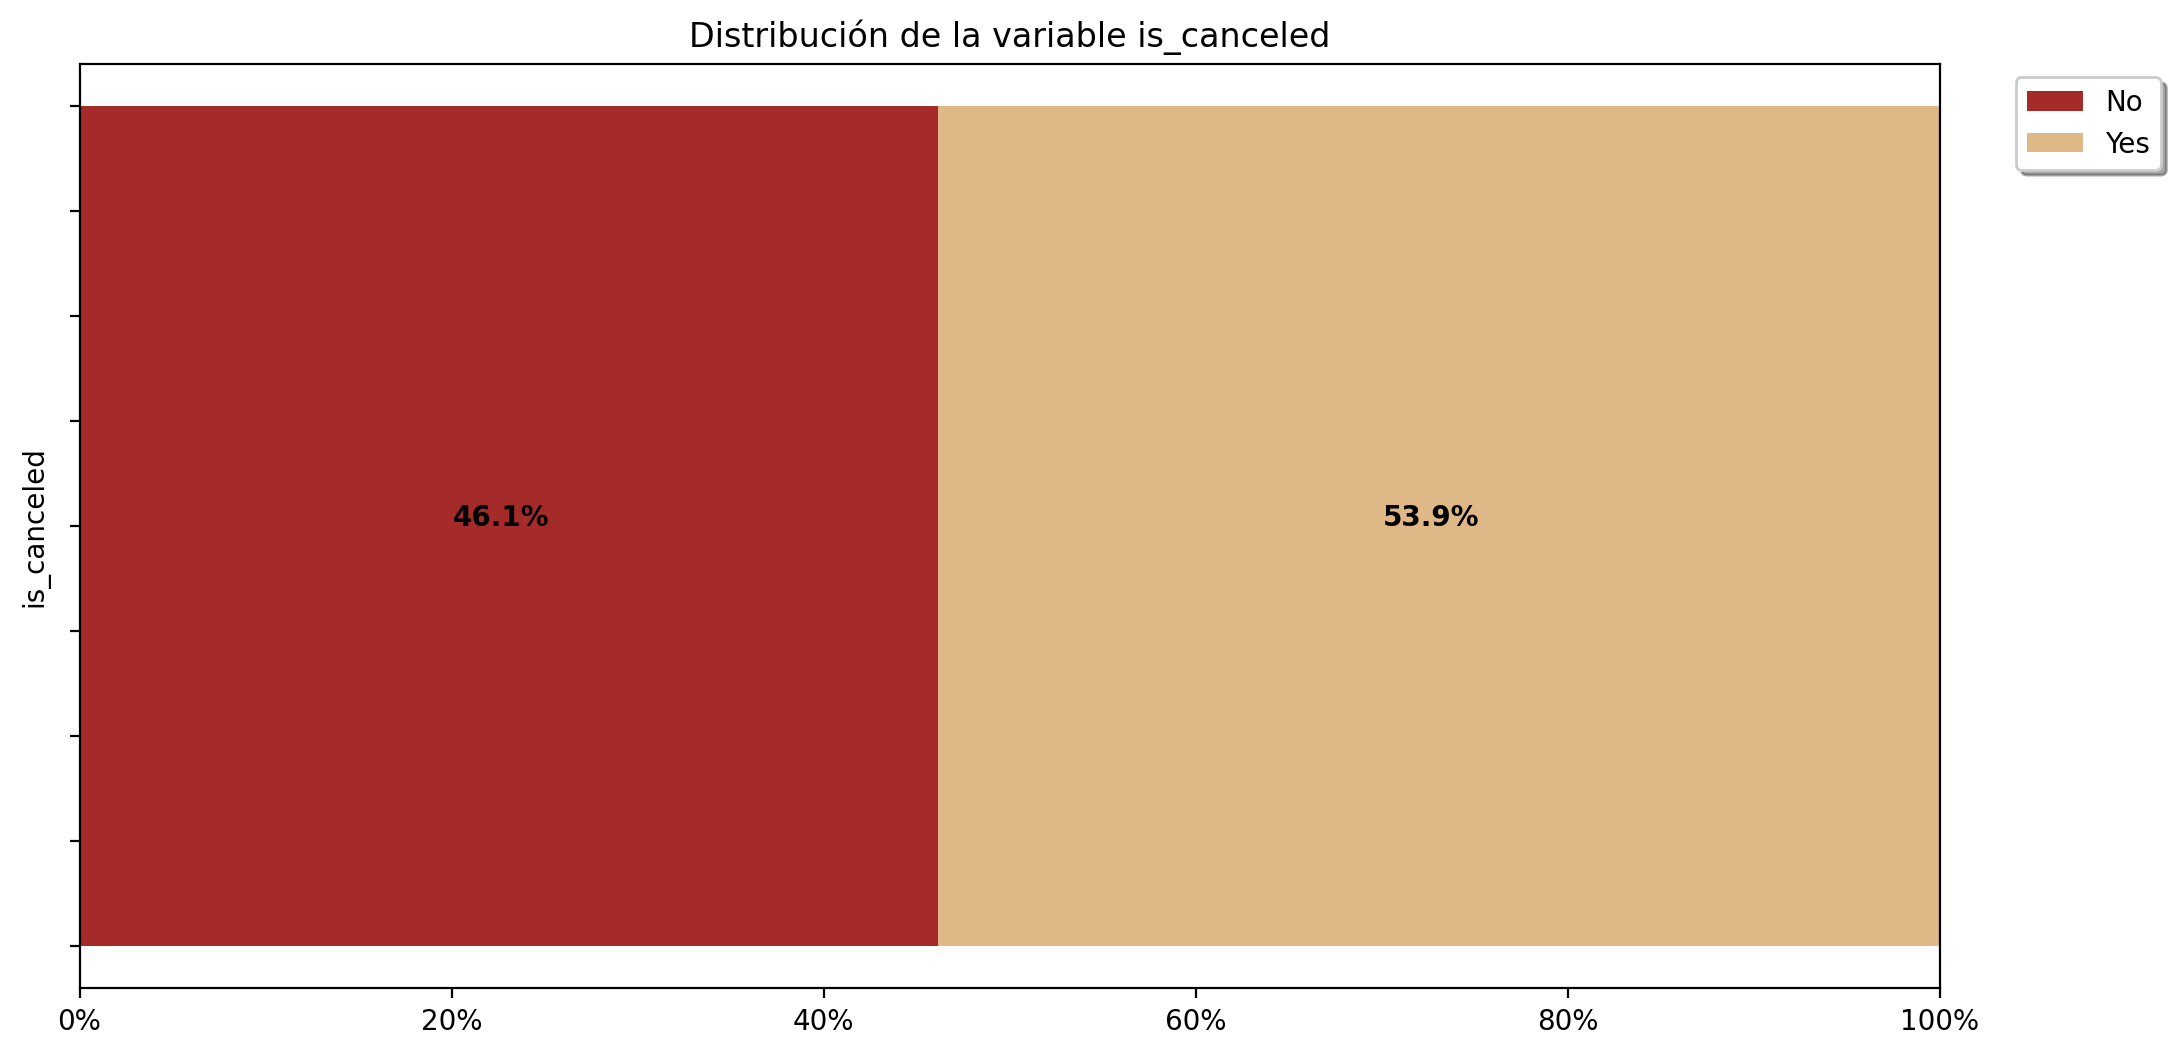

In [140]:
#Balance de las clases en la variable a predecir - Problema balanceado
analisis_Credito = Analisis_Predictivo(datos, predecir="is_canceled")
analisis_Credito.distribucion_variable_predecir()
plt.show()

a) Utilice Máquinas de Soporte Vectorial en Python (con los parámetros por defecto) para generar un modelo predictivo para la tabla 'hotel_bookings_completos.csv' utilizando el 70 % de los datos para el conjunto de entrenamiento y el 30 % para el conjunto de prueba. Luego, calcule la matriz de confusión, la precisión global y la precisión para cada una de las dos categorías utilizando los datos de prueba. ¿Son buenos los resultados? Explique.

In [108]:
# Tenemos disponibles los núcleos linear, poly, rbf, sigmoid, precomputed. Por defecto se utiliza rbf
instancia_svm = SVC(kernel="rbf")

analisis_booking = Analisis_Predictivo(datos, predecir = "is_canceled", modelo = instancia_svm, train_size = 0.7)

In [109]:
resultados = analisis_booking.fit_predict_resultados()


Matriz de Confusión:
[[2542  284]
 [ 655 2633]]

Precisión Global:
0.8464180569185475

Error Global:
0.15358194308145245

Precisión por categoría:
         No       Yes
0  0.899505  0.800791


Los resultados son relativamente buenos, ya que se alcanza una precision global de 85% y una precision por categoria superior al 80%

b) Repita el ítem anterior, pero intente identificar el mejor núcleo (kernel) y valor para el parámetro de regularización C. ¿Mejora la predicción?

In [110]:
nucleos = ["linear", "poly", "rbf", "sigmoid"]
resultados_modelos = {}

for nucleo in nucleos:
    nombre_analisis = f"analisis_{nucleo}"  # Nombre del análisis usando el nombre del núcleo
    instancia_svm = SVC(kernel=nucleo)
    # Definir analisis_cancer con un nombre diferente según el núcleo utilizado
    exec(f"{nombre_analisis} = Analisis_Predictivo(datos, predecir='is_canceled', modelo=instancia_svm, train_size=0.7)")
    print("\033[1m" + nombre_analisis + "\033[0m")  # Imprimir en negrita
    resultados = eval(nombre_analisis).fit_predict_resultados()
    resultados_modelos[nucleo] = resultados

analisis_linear

Matriz de Confusión:
[[2662  165]
 [ 978 2309]]

Precisión Global:
0.8130520117762512

Error Global:
0.1869479882237488

Precisión por categoría:
         No       Yes
0  0.941634  0.702464
analisis_poly

Matriz de Confusión:
[[2490  260]
 [ 659 2705]]

Precisión Global:
0.8496892378148512

Error Global:
0.15031076218514883

Precisión por categoría:
         No       Yes
0  0.905455  0.804102
analisis_rbf

Matriz de Confusión:
[[2558  283]
 [ 632 2641]]

Precisión Global:
0.8503434739941119

Error Global:
0.14965652600588808

Precisión por categoría:
         No       Yes
0  0.900387  0.806905
analisis_sigmoid

Matriz de Confusión:
[[1991  813]
 [ 891 2419]]

Precisión Global:
0.7212953876349362

Error Global:
0.27870461236506383

Precisión por categoría:
         No       Yes
0  0.710057  0.730816


No mejora la prediccion usando otros nucleos del modelo de svm.

c) Construya un DataFrame que compare el mejor modelo generado anteriormente contra los mejores modelos construidos en tareas anteriores para la tabla 'hotel_bookings_completos.csv'. En cada fila debe aparecer un modelo predictivo, y en las columnas deben aparecer los índices de Precisión Global, Error Global, Precisión Positiva (PP) y Precisión Negativa (PN). ¿Cuál de los modelos es mejor para estos datos?

In [111]:
# Variables para almacenar las métricas de cada núcleo
metrics_linear = {}
metrics_poly = {}
metrics_rbf = {}
metrics_sigmoid = {}

# Iterar sobre cada núcleo
for nucleo in nucleos:
    matriz_confusion = resultados_modelos[nucleo]['Matriz de Confusión']
    print(f"Métricas SVM {nucleo}:")
    # Extraer los valores de la matriz de confusión
    TP = matriz_confusion[0][0]
    FP = matriz_confusion[0][1]
    FN = matriz_confusion[1][0]
    TN = matriz_confusion[1][1]
    # Crear un vector de 1x4 con los valores extraídos
    MC_nucleo = [TP, FP, FN, TN]
    # Métricas
    calculator_nucleo = MetricsCalculator(MC_nucleo)
    metrics_nucleo = calculator_nucleo.calculate_metrics()
    # Asignar las métricas a la variable correspondiente
    if nucleo == "linear":
        metrics_linear = metrics_nucleo
    elif nucleo == "poly":
        metrics_poly = metrics_nucleo
    elif nucleo == "rbf":
        metrics_rbf = metrics_nucleo
    elif nucleo == "sigmoid":
        metrics_sigmoid = metrics_nucleo
    # Imprimir métricas
    for metric, value in metrics_nucleo.items():
        print(f"{metric}: {value}")


Métricas SVM linear:
Precisión Global: 0.8130520117762512
Error Global: 0.1869479882237488
Precisión Positiva: 0.702464253118345
Precisión Negativa: 0.9416342412451362
Métricas SVM poly:
Precisión Global: 0.8496892378148512
Error Global: 0.15031076218514883
Precisión Positiva: 0.8041022592152199
Precisión Negativa: 0.9054545454545454
Métricas SVM rbf:
Precisión Global: 0.8503434739941119
Error Global: 0.14965652600588808
Precisión Positiva: 0.8069049801405438
Precisión Negativa: 0.9003871876099965
Métricas SVM sigmoid:
Precisión Global: 0.7212953876349362
Error Global: 0.27870461236506383
Precisión Positiva: 0.7308157099697885
Precisión Negativa: 0.7100570613409415


In [112]:
# Creamos los nuevos datos asociados a los nuevos modelos
data = {
    'Modelo Predictivo': ['SVM linear', 'SVM poly', 'SVM rbf', 'SVM sigmoid'],
    'Precisión Global': [metrics_linear['Precisión Global'], metrics_poly['Precisión Global'], metrics_rbf['Precisión Global'], metrics_sigmoid['Precisión Global']],
    'Error Global': [metrics_linear['Error Global'], metrics_poly['Error Global'], metrics_rbf['Error Global'], metrics_sigmoid['Error Global']],
    'Precisión Positiva': [metrics_linear['Precisión Positiva'], metrics_poly['Precisión Positiva'], metrics_rbf['Precisión Positiva'],  metrics_sigmoid['Precisión Positiva']],
    'Precisión Negativa': [metrics_linear['Precisión Negativa'], metrics_poly['Precisión Negativa'], metrics_rbf['Precisión Negativa'], metrics_sigmoid['Precisión Negativa']]
}

# Crear el DataFrame
df = pd.DataFrame(data)

In [113]:
df

,Modelo Predictivo,Precisión Global,Error Global,Precisión Positiva,Precisión Negativa
0,SVM linear,0.813052,0.186948,0.702464,0.941634
1,SVM poly,0.849689,0.150311,0.804102,0.905455
2,SVM rbf,0.850343,0.149657,0.806905,0.900387
3,SVM sigmoid,0.721295,0.278705,0.730816,0.710057


In [114]:
# Cargar el DataFrame de los resultados de la tarea anterior
datos_anteriores = pd.read_csv('resultados_booking.csv')

# Concatenar ambos DataFrames a lo largo de las columnas
datos_completos_booking = pd.concat([datos_anteriores, df], axis=0)

# Imprimir el DataFrame completo
print(datos_completos_booking.to_string(index=False))

Modelo Predictivo  Precisión Global  Error Global  Precisión Positiva  Precisión Negativa
              KNN          0.766111      0.233889            0.803517            0.722301
Árbol de Decisión          0.852797      0.147203            0.870528            0.832031
    Random Forest          0.883873      0.116127            0.876960            0.892066
     Ada Boosting          0.877821      0.122179            0.867201            0.890830
       XGBoosting          0.864082      0.135918            0.855372            0.874078
       SVM linear          0.813052      0.186948            0.702464            0.941634
         SVM poly          0.849689      0.150311            0.804102            0.905455
          SVM rbf          0.850343      0.149657            0.806905            0.900387
      SVM sigmoid          0.721295      0.278705            0.730816            0.710057


d) Utilizando el mejor modelo construido, prediga los nuevos individuos que se encuentran en el archivo 'nuevos_hotel_bookings_completos.csv'. Para ello, utilice la tabla completa 'hotel_bookings_completos.csv' como datos de entrenamiento y la tabla 'nuevos_hotel_bookings_completos.csv' como datos de prueba. Recuerde que si ha estandarizado los datos para entrenar el modelo, debe guardar los valores como la media y la desviación estándar para estandarizar los nuevos individuos.

## Generamos el mejor modelo con toda la tabla de datos

In [141]:
datos2 = datos.drop(columns=['is_canceled'])

In [142]:
#Construccion del modelo: Bosques Aleatorios
instancia_bosques = RandomForestClassifier(n_estimators = 155, criterion = "gini", min_samples_split = 2)

# Hacemos los cálculos con el método fit pero esta vez sobre toda la tabla, además usamos el método .drop para solo pasarle las variables predictoras, en este caso no es solo el training si no toda la tabla.
modelo = instancia_bosques.fit(datos2, datos.is_canceled) 


## Cargamos los nuevos datos

In [144]:
#lectura de datos
datos_nuevos = pd.read_csv('C:/Users/uriar/OneDrive/Fátima Uriarte/Fati Files/PROMIDAD Generacion ETA/Python/3. Metodos Supervisados Python/Clase 4/Tarea4/nuevos_hotel_bookings.csv',delimiter = ',',decimal = ".")
print("Hotel bookings completo: ", datos_nuevos.shape, "\n")

Hotel bookings completo:  (1020, 19) 



In [145]:
# Convierte las variables a categórica
for col in ['hotel', 'arrival_date_month', 'assigned_room_type', 'deposit_type', 'customer_type']:
    datos_nuevos[col] = datos_nuevos[col].astype('category')
    datos_nuevos[col] = datos_nuevos[col].cat.codes
    datos_nuevos[col] = datos_nuevos[col].astype('category')
datos_nuevos.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,Yes,36,3,3,7,2,0,0,0,0,0,0,0,0,2,42.0,0,2
1,1,Yes,23,3,0,3,2,0,0,0,0,0,0,0,0,2,48.0,0,0
2,1,Yes,112,3,2,4,2,0,0,0,0,3,0,0,0,2,52.0,0,2
3,1,Yes,4,3,0,3,2,0,0,0,0,0,0,0,0,2,48.0,0,0
4,1,Yes,115,3,2,6,2,0,0,0,0,0,0,0,0,2,37.8,0,1


In [146]:
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           1020 non-null   category
 1   is_canceled                     1020 non-null   object  
 2   lead_time                       1020 non-null   int64   
 3   arrival_date_month              1020 non-null   category
 4   stays_in_weekend_nights         1020 non-null   int64   
 5   stays_in_week_nights            1020 non-null   int64   
 6   adults                          1020 non-null   int64   
 7   children                        1020 non-null   int64   
 8   babies                          1020 non-null   int64   
 9   previous_cancellations          1020 non-null   int64   
 10  previous_bookings_not_canceled  1020 non-null   int64   
 11  assigned_room_type              1020 non-null   category
 12  booking_changes     

## Predecimos a los nuevos individuos

In [148]:
#Se predice para los nuevos individuos y se incluye en el data frame
booking_pred = instancia_bosques.predict(datos_nuevos.drop('is_canceled', axis = 1))
datos_nuevos.is_canceled = booking_pred # Se añade la predicción a la tabla

In [151]:
datos_nuevos

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,Yes,36,3,3,7,2,0,0,0,0,0,0,0,0,2,42.0,0,2
1,1,Yes,23,3,0,3,2,0,0,0,0,0,0,0,0,2,48.0,0,0
2,1,Yes,112,3,2,4,2,0,0,0,0,3,0,0,0,2,52.0,0,2
3,1,Yes,4,3,0,3,2,0,0,0,0,0,0,0,0,2,48.0,0,0
4,1,Yes,115,3,2,6,2,0,0,0,0,0,0,0,0,2,37.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,No,156,1,0,3,2,3,0,0,0,6,0,0,0,2,260.0,0,1
1016,0,No,8,1,0,1,2,0,0,0,0,0,0,0,0,2,128.0,0,0
1017,0,No,0,1,0,1,1,0,0,0,0,0,1,0,0,2,179.0,0,0
1018,0,No,259,1,1,2,2,0,0,0,0,0,0,0,0,2,89.1,0,1


In [150]:
datos_nuevos.to_csv('nuevos_hotel_bookings_completos_pred.csv', index=False)